In [1]:
%pip install -q matplotlib networkx pandas torchinfo
%load_ext autoreload
%autoreload 2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import functions

In [3]:
HPARAMS = {
    "data": {
        "window_size": 24,
        "stride_length": 1,
        "lead_time": 1,
        "edge_direction": "bidirectional",
        "normalized": True
    },
    "model": {
        "architecture": "ResGCN",
        "num_layers": 20,
        "hidden_channels": 64,
        "param_sharing": False,
        "graff_step_size": 1,
        "adjacency_type": "learned"
    },
    "training": {
        "num_epochs": 20,
        "batch_size": 16,
        "learning_rate": 1e-4,
        "weight_decay": 0,
        "random_seed": 42,
        "holdout_size": 0.25
    }
}

In [4]:
functions.ensure_reproducibility(HPARAMS["training"]["random_seed"])

In [5]:
for value in ["isolated", "binary", "stream_length", "elevation_difference", "average_slope", "learned"]:
    HPARAMS["model"]["adjacency_type"] = value
    dataset = functions.load_dataset(HPARAMS, "train")
    model = functions.construct_model(HPARAMS, dataset)
    history = functions.train(model, dataset, HPARAMS, save_dir="runs/adjacency_type_given_bidirectional", on_ipu=True)

Loading dataset into memory...


100%|██████████| 375/375 [00:29<00:00, 12.62it/s]


Layer (type:depth-idx)                   Param #
ResGCN                                   --
├─Linear: 1-1                            1,600
├─Linear: 1-2                            65
├─ModuleList: 1-3                        --
│    └─GCNConv: 2-1                      4,160
│    └─GCNConv: 2-2                      4,160
│    └─GCNConv: 2-3                      4,160
│    └─GCNConv: 2-4                      4,160
│    └─GCNConv: 2-5                      4,160
│    └─GCNConv: 2-6                      4,160
│    └─GCNConv: 2-7                      4,160
│    └─GCNConv: 2-8                      4,160
│    └─GCNConv: 2-9                      4,160
│    └─GCNConv: 2-10                     4,160
│    └─GCNConv: 2-11                     4,160
│    └─GCNConv: 2-12                     4,160
│    └─GCNConv: 2-13                     4,160
│    └─GCNConv: 2-14                     4,160
│    └─GCNConv: 2-15                     4,160
│    └─GCNConv: 2-16                     4,160
│    └─GCNConv: 2-17

Graph compilation: 100%|██████████| 100/100 [02:06<00:00]


Training on IPU


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 119.08it/s]
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1432: UserWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


[Epoch 1/20] Train: 92.7849 | Val 0.7559


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 118.48it/s]


[Epoch 2/20] Train: 0.7874 | Val 0.1367


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 119.39it/s]


[Epoch 3/20] Train: 0.1274 | Val 0.0589


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 119.15it/s]


[Epoch 4/20] Train: 0.0342 | Val 0.0343


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 119.01it/s]


[Epoch 5/20] Train: 0.0220 | Val 0.0231


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 120.25it/s]


[Epoch 6/20] Train: 0.0196 | Val 0.0217


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 118.81it/s]


[Epoch 7/20] Train: 0.0180 | Val 0.0207


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 120.69it/s]


[Epoch 8/20] Train: 0.0173 | Val 0.0199


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 119.91it/s]


[Epoch 9/20] Train: 0.0169 | Val 0.0197


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 119.53it/s]


[Epoch 10/20] Train: 0.0166 | Val 0.0188


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 120.85it/s]


[Epoch 11/20] Train: 0.0164 | Val 0.0187


Validating: 100%|██████████| 2185/2185 [00:17<00:00, 121.86it/s]


[Epoch 12/20] Train: 0.0162 | Val 0.0184


Validating: 100%|██████████| 2185/2185 [00:17<00:00, 122.59it/s]


[Epoch 13/20] Train: 0.0161 | Val 0.0181


Validating: 100%|██████████| 2185/2185 [00:17<00:00, 121.78it/s]


[Epoch 14/20] Train: 0.0160 | Val 0.0180


Validating: 100%|██████████| 2185/2185 [00:17<00:00, 121.56it/s]


[Epoch 15/20] Train: 0.0160 | Val 0.0177


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 120.91it/s]


[Epoch 16/20] Train: 0.0159 | Val 0.0179


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 120.95it/s]


[Epoch 17/20] Train: 0.0158 | Val 0.0180


Validating: 100%|██████████| 2185/2185 [00:17<00:00, 121.47it/s]


[Epoch 18/20] Train: 0.0157 | Val 0.0176


Validating: 100%|██████████| 2185/2185 [00:17<00:00, 121.83it/s]


[Epoch 19/20] Train: 0.0156 | Val 0.0182


Validating: 100%|██████████| 2185/2185 [00:17<00:00, 121.73it/s]


[Epoch 20/20] Train: 0.0155 | Val 0.0179
Loading dataset into memory...


100%|██████████| 375/375 [00:28<00:00, 12.98it/s]


Layer (type:depth-idx)                   Param #
ResGCN                                   --
├─Linear: 1-1                            1,600
├─Linear: 1-2                            65
├─ModuleList: 1-3                        --
│    └─GCNConv: 2-1                      4,160
│    └─GCNConv: 2-2                      4,160
│    └─GCNConv: 2-3                      4,160
│    └─GCNConv: 2-4                      4,160
│    └─GCNConv: 2-5                      4,160
│    └─GCNConv: 2-6                      4,160
│    └─GCNConv: 2-7                      4,160
│    └─GCNConv: 2-8                      4,160
│    └─GCNConv: 2-9                      4,160
│    └─GCNConv: 2-10                     4,160
│    └─GCNConv: 2-11                     4,160
│    └─GCNConv: 2-12                     4,160
│    └─GCNConv: 2-13                     4,160
│    └─GCNConv: 2-14                     4,160
│    └─GCNConv: 2-15                     4,160
│    └─GCNConv: 2-16                     4,160
│    └─GCNConv: 2-17

Graph compilation: 100%|██████████| 100/100 [02:03<00:00]


Training on IPU


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 120.75it/s]
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1432: UserWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


[Epoch 1/20] Train: 2080.5449 | Val 13.2546


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 120.36it/s]


[Epoch 2/20] Train: 9.7689 | Val 0.7618


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 119.74it/s]


[Epoch 3/20] Train: 0.2831 | Val 0.0894


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 115.09it/s]


[Epoch 4/20] Train: 0.0505 | Val 0.0307


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 114.16it/s]


[Epoch 5/20] Train: 0.0292 | Val 0.0232


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 116.02it/s]


[Epoch 6/20] Train: 0.0218 | Val 0.0201


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 114.22it/s]


[Epoch 7/20] Train: 0.0196 | Val 0.0188


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 114.31it/s]


[Epoch 8/20] Train: 0.0181 | Val 0.0181


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 115.32it/s]


[Epoch 9/20] Train: 0.0176 | Val 0.0178


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 113.29it/s]


[Epoch 10/20] Train: 0.0171 | Val 0.0175


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 113.86it/s]


[Epoch 11/20] Train: 0.0165 | Val 0.0174


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 114.64it/s]


[Epoch 12/20] Train: 0.0165 | Val 0.0170


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 114.98it/s]


[Epoch 13/20] Train: 0.0163 | Val 0.0169


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 113.82it/s]


[Epoch 14/20] Train: 0.0159 | Val 0.0168


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 113.41it/s]


[Epoch 15/20] Train: 0.0158 | Val 0.0167


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 113.20it/s]


[Epoch 16/20] Train: 0.0156 | Val 0.0164


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 113.58it/s]


[Epoch 17/20] Train: 0.0154 | Val 0.0165


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 113.70it/s]


[Epoch 18/20] Train: 0.0154 | Val 0.0164


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 114.69it/s]


[Epoch 19/20] Train: 0.0154 | Val 0.0162


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 113.75it/s]


[Epoch 20/20] Train: 0.0152 | Val 0.0161
Loading dataset into memory...


100%|██████████| 375/375 [00:29<00:00, 12.58it/s]


Layer (type:depth-idx)                   Param #
ResGCN                                   --
├─Linear: 1-1                            1,600
├─Linear: 1-2                            65
├─ModuleList: 1-3                        --
│    └─GCNConv: 2-1                      4,160
│    └─GCNConv: 2-2                      4,160
│    └─GCNConv: 2-3                      4,160
│    └─GCNConv: 2-4                      4,160
│    └─GCNConv: 2-5                      4,160
│    └─GCNConv: 2-6                      4,160
│    └─GCNConv: 2-7                      4,160
│    └─GCNConv: 2-8                      4,160
│    └─GCNConv: 2-9                      4,160
│    └─GCNConv: 2-10                     4,160
│    └─GCNConv: 2-11                     4,160
│    └─GCNConv: 2-12                     4,160
│    └─GCNConv: 2-13                     4,160
│    └─GCNConv: 2-14                     4,160
│    └─GCNConv: 2-15                     4,160
│    └─GCNConv: 2-16                     4,160
│    └─GCNConv: 2-17

Graph compilation: 100%|██████████| 100/100 [00:02<00:00]


Training on IPU


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 118.10it/s]
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1432: UserWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


[Epoch 1/20] Train: 28.2174 | Val 2.0193


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 116.62it/s]


[Epoch 2/20] Train: 0.5740 | Val 0.4289


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 116.57it/s]


[Epoch 3/20] Train: 0.0652 | Val 0.0702


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 115.55it/s]


[Epoch 4/20] Train: 0.0357 | Val 0.0265


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 114.97it/s]


[Epoch 5/20] Train: 0.0233 | Val 0.0196


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 114.64it/s]


[Epoch 6/20] Train: 0.0208 | Val 0.0175


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 115.14it/s]


[Epoch 7/20] Train: 0.0193 | Val 0.0165


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 113.61it/s]


[Epoch 8/20] Train: 0.0181 | Val 0.0161


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 113.14it/s]


[Epoch 9/20] Train: 0.0176 | Val 0.0157


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 113.41it/s]


[Epoch 10/20] Train: 0.0171 | Val 0.0156


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 113.11it/s]


[Epoch 11/20] Train: 0.0167 | Val 0.0154


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 112.62it/s]


[Epoch 12/20] Train: 0.0167 | Val 0.0151


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 113.00it/s]


[Epoch 13/20] Train: 0.0164 | Val 0.0151


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 112.78it/s]


[Epoch 14/20] Train: 0.0161 | Val 0.0149


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 113.21it/s]


[Epoch 15/20] Train: 0.0164 | Val 0.0146


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 113.17it/s]


[Epoch 16/20] Train: 0.0160 | Val 0.0146


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 112.12it/s]


[Epoch 17/20] Train: 0.0158 | Val 0.0146


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 112.58it/s]


[Epoch 18/20] Train: 0.0158 | Val 0.0144


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 112.12it/s]


[Epoch 19/20] Train: 0.0156 | Val 0.0143


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 111.65it/s]


[Epoch 20/20] Train: 0.0158 | Val 0.0142
Loading dataset into memory...


100%|██████████| 375/375 [00:30<00:00, 12.42it/s]


Layer (type:depth-idx)                   Param #
ResGCN                                   --
├─Linear: 1-1                            1,600
├─Linear: 1-2                            65
├─ModuleList: 1-3                        --
│    └─GCNConv: 2-1                      4,160
│    └─GCNConv: 2-2                      4,160
│    └─GCNConv: 2-3                      4,160
│    └─GCNConv: 2-4                      4,160
│    └─GCNConv: 2-5                      4,160
│    └─GCNConv: 2-6                      4,160
│    └─GCNConv: 2-7                      4,160
│    └─GCNConv: 2-8                      4,160
│    └─GCNConv: 2-9                      4,160
│    └─GCNConv: 2-10                     4,160
│    └─GCNConv: 2-11                     4,160
│    └─GCNConv: 2-12                     4,160
│    └─GCNConv: 2-13                     4,160
│    └─GCNConv: 2-14                     4,160
│    └─GCNConv: 2-15                     4,160
│    └─GCNConv: 2-16                     4,160
│    └─GCNConv: 2-17

Graph compilation: 100%|██████████| 100/100 [00:02<00:00]


Training on IPU


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 119.91it/s]
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1432: UserWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


[Epoch 1/20] Train: 146.2717 | Val 6.1029


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 119.62it/s]


[Epoch 2/20] Train: 0.8243 | Val 0.1150


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 118.87it/s]


[Epoch 3/20] Train: 0.1475 | Val 0.0459


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 116.02it/s]


[Epoch 4/20] Train: 0.0371 | Val 0.0349


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 115.63it/s]


[Epoch 5/20] Train: 0.0244 | Val 0.0258


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 114.68it/s]


[Epoch 6/20] Train: 0.0188 | Val 0.0231


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 115.02it/s]


[Epoch 7/20] Train: 0.0174 | Val 0.0219


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 116.38it/s]


[Epoch 8/20] Train: 0.0165 | Val 0.0207


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 115.11it/s]


[Epoch 9/20] Train: 0.0162 | Val 0.0205


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 115.82it/s]


[Epoch 10/20] Train: 0.0159 | Val 0.0198


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 113.89it/s]


[Epoch 11/20] Train: 0.0157 | Val 0.0196


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 114.41it/s]


[Epoch 12/20] Train: 0.0154 | Val 0.0193


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 115.15it/s]


[Epoch 13/20] Train: 0.0152 | Val 0.0191


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 113.26it/s]


[Epoch 14/20] Train: 0.0152 | Val 0.0187


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 115.16it/s]


[Epoch 15/20] Train: 0.0152 | Val 0.0186


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 113.17it/s]


[Epoch 16/20] Train: 0.0150 | Val 0.0184


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 113.75it/s]


[Epoch 17/20] Train: 0.0148 | Val 0.0184


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 113.82it/s]


[Epoch 18/20] Train: 0.0146 | Val 0.0179


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 113.01it/s]


[Epoch 19/20] Train: 0.0148 | Val 0.0177


Validating: 100%|██████████| 2185/2185 [00:19<00:00, 114.88it/s]


[Epoch 20/20] Train: 0.0145 | Val 0.0175
Loading dataset into memory...


100%|██████████| 375/375 [00:29<00:00, 12.53it/s]


Layer (type:depth-idx)                   Param #
ResGCN                                   --
├─Linear: 1-1                            1,600
├─Linear: 1-2                            65
├─ModuleList: 1-3                        --
│    └─GCNConv: 2-1                      4,160
│    └─GCNConv: 2-2                      4,160
│    └─GCNConv: 2-3                      4,160
│    └─GCNConv: 2-4                      4,160
│    └─GCNConv: 2-5                      4,160
│    └─GCNConv: 2-6                      4,160
│    └─GCNConv: 2-7                      4,160
│    └─GCNConv: 2-8                      4,160
│    └─GCNConv: 2-9                      4,160
│    └─GCNConv: 2-10                     4,160
│    └─GCNConv: 2-11                     4,160
│    └─GCNConv: 2-12                     4,160
│    └─GCNConv: 2-13                     4,160
│    └─GCNConv: 2-14                     4,160
│    └─GCNConv: 2-15                     4,160
│    └─GCNConv: 2-16                     4,160
│    └─GCNConv: 2-17

Graph compilation: 100%|██████████| 100/100 [00:02<00:00]


Training on IPU


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 119.05it/s]
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1432: UserWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


[Epoch 1/20] Train: 158.8675 | Val 2.8054


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 116.17it/s]


[Epoch 2/20] Train: 2.3867 | Val 0.6256


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 117.87it/s]


[Epoch 3/20] Train: 0.1455 | Val 0.0610


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 116.87it/s]


[Epoch 4/20] Train: 0.0494 | Val 0.0288


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 115.38it/s]


[Epoch 5/20] Train: 0.0256 | Val 0.0225


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 117.58it/s]


[Epoch 6/20] Train: 0.0213 | Val 0.0196


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 116.37it/s]


[Epoch 7/20] Train: 0.0186 | Val 0.0187


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 116.28it/s]


[Epoch 8/20] Train: 0.0181 | Val 0.0181


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 116.66it/s]


[Epoch 9/20] Train: 0.0176 | Val 0.0174


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 117.50it/s]


[Epoch 10/20] Train: 0.0168 | Val 0.0172


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 115.89it/s]


[Epoch 11/20] Train: 0.0165 | Val 0.0168


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 116.45it/s]


[Epoch 12/20] Train: 0.0163 | Val 0.0165


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 116.96it/s]


[Epoch 13/20] Train: 0.0162 | Val 0.0163


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 116.69it/s]


[Epoch 14/20] Train: 0.0160 | Val 0.0161


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 116.37it/s]


[Epoch 15/20] Train: 0.0160 | Val 0.0159


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 115.85it/s]


[Epoch 16/20] Train: 0.0157 | Val 0.0156


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 117.41it/s]


[Epoch 17/20] Train: 0.0157 | Val 0.0154


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 116.27it/s]


[Epoch 18/20] Train: 0.0155 | Val 0.0152


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 117.87it/s]


[Epoch 19/20] Train: 0.0155 | Val 0.0151


Validating: 100%|██████████| 2185/2185 [00:18<00:00, 118.74it/s]


[Epoch 20/20] Train: 0.0153 | Val 0.0149
Loading dataset into memory...


100%|██████████| 375/375 [00:29<00:00, 12.58it/s]


Layer (type:depth-idx)                   Param #
ResGCN                                   748
├─Linear: 1-1                            1,600
├─Linear: 1-2                            65
├─ModuleList: 1-3                        --
│    └─GCNConv: 2-1                      4,160
│    └─GCNConv: 2-2                      4,160
│    └─GCNConv: 2-3                      4,160
│    └─GCNConv: 2-4                      4,160
│    └─GCNConv: 2-5                      4,160
│    └─GCNConv: 2-6                      4,160
│    └─GCNConv: 2-7                      4,160
│    └─GCNConv: 2-8                      4,160
│    └─GCNConv: 2-9                      4,160
│    └─GCNConv: 2-10                     4,160
│    └─GCNConv: 2-11                     4,160
│    └─GCNConv: 2-12                     4,160
│    └─GCNConv: 2-13                     4,160
│    └─GCNConv: 2-14                     4,160
│    └─GCNConv: 2-15                     4,160
│    └─GCNConv: 2-16                     4,160
│    └─GCNConv: 2-1

Graph compilation: 100%|██████████| 100/100 [03:00<00:00]


Training on IPU


Validating: 100%|██████████| 2185/2185 [00:20<00:00, 104.52it/s]
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1432: UserWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


[Epoch 1/20] Train: 120.2506 | Val 4.8956


Validating: 100%|██████████| 2185/2185 [00:21<00:00, 103.97it/s]


[Epoch 2/20] Train: 1.7657 | Val 0.3159


Validating: 100%|██████████| 2185/2185 [00:21<00:00, 103.91it/s]


[Epoch 3/20] Train: 0.2343 | Val 0.0754


Validating: 100%|██████████| 2185/2185 [00:20<00:00, 104.11it/s]


[Epoch 4/20] Train: 0.0354 | Val 0.0351


Validating: 100%|██████████| 2185/2185 [00:21<00:00, 101.01it/s]


[Epoch 5/20] Train: 0.0225 | Val 0.0253


Validating: 100%|██████████| 2185/2185 [00:21<00:00, 99.42it/s] 


[Epoch 6/20] Train: 0.0185 | Val 0.0229


Validating: 100%|██████████| 2185/2185 [00:21<00:00, 99.98it/s] 


[Epoch 7/20] Train: 0.0169 | Val 0.0219


Validating: 100%|██████████| 2185/2185 [00:21<00:00, 99.88it/s] 


[Epoch 8/20] Train: 0.0162 | Val 0.0210


Validating: 100%|██████████| 2185/2185 [00:21<00:00, 99.62it/s] 


[Epoch 9/20] Train: 0.0158 | Val 0.0202


Validating: 100%|██████████| 2185/2185 [00:21<00:00, 100.24it/s]


[Epoch 10/20] Train: 0.0155 | Val 0.0199


Validating: 100%|██████████| 2185/2185 [00:21<00:00, 100.63it/s]


[Epoch 11/20] Train: 0.0153 | Val 0.0195


Validating: 100%|██████████| 2185/2185 [00:21<00:00, 100.14it/s]


[Epoch 12/20] Train: 0.0151 | Val 0.0192


Validating: 100%|██████████| 2185/2185 [00:21<00:00, 100.42it/s]


[Epoch 13/20] Train: 0.0148 | Val 0.0188


Validating: 100%|██████████| 2185/2185 [00:21<00:00, 100.28it/s]


[Epoch 14/20] Train: 0.0148 | Val 0.0183


Validating: 100%|██████████| 2185/2185 [00:21<00:00, 100.17it/s]


[Epoch 15/20] Train: 0.0147 | Val 0.0182


Validating: 100%|██████████| 2185/2185 [00:21<00:00, 100.63it/s]


[Epoch 16/20] Train: 0.0146 | Val 0.0180


Validating: 100%|██████████| 2185/2185 [00:21<00:00, 102.20it/s]


[Epoch 17/20] Train: 0.0144 | Val 0.0178


Validating: 100%|██████████| 2185/2185 [00:21<00:00, 101.01it/s]


[Epoch 18/20] Train: 0.0143 | Val 0.0174


Validating: 100%|██████████| 2185/2185 [00:21<00:00, 101.24it/s]


[Epoch 19/20] Train: 0.0142 | Val 0.0170


Validating: 100%|██████████| 2185/2185 [00:21<00:00, 101.43it/s]


[Epoch 20/20] Train: 0.0142 | Val 0.0170


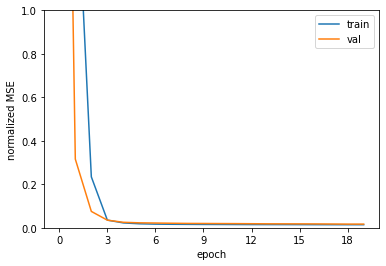

[Epoch 20] Train: 0.0142 | Val: 0.0170


In [6]:
functions.plot_loss(history["train_loss"], history["val_loss"])